# Linear Regression from Scratch on the California Housing Dataset

This notebook implements a simple **Linear Regression** model from scratch using only NumPy for the linear‑algebra operations.  
We will:

1. Load and split the California Housing dataset (80 % train / 20 % test).  
2. Implement a `MyLinearRegression` class with `fit` and `predict` methods.  
3. Train the custom model and evaluate it with **Mean Squared Error (MSE)** on both the training and test sets.  
4. Train Scikit‑Learn’s `LinearRegression` on the same data and compare the results.  


In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
np.random.seed(42) #keeps things reproducable


First 5 rows:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



Data Summary:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


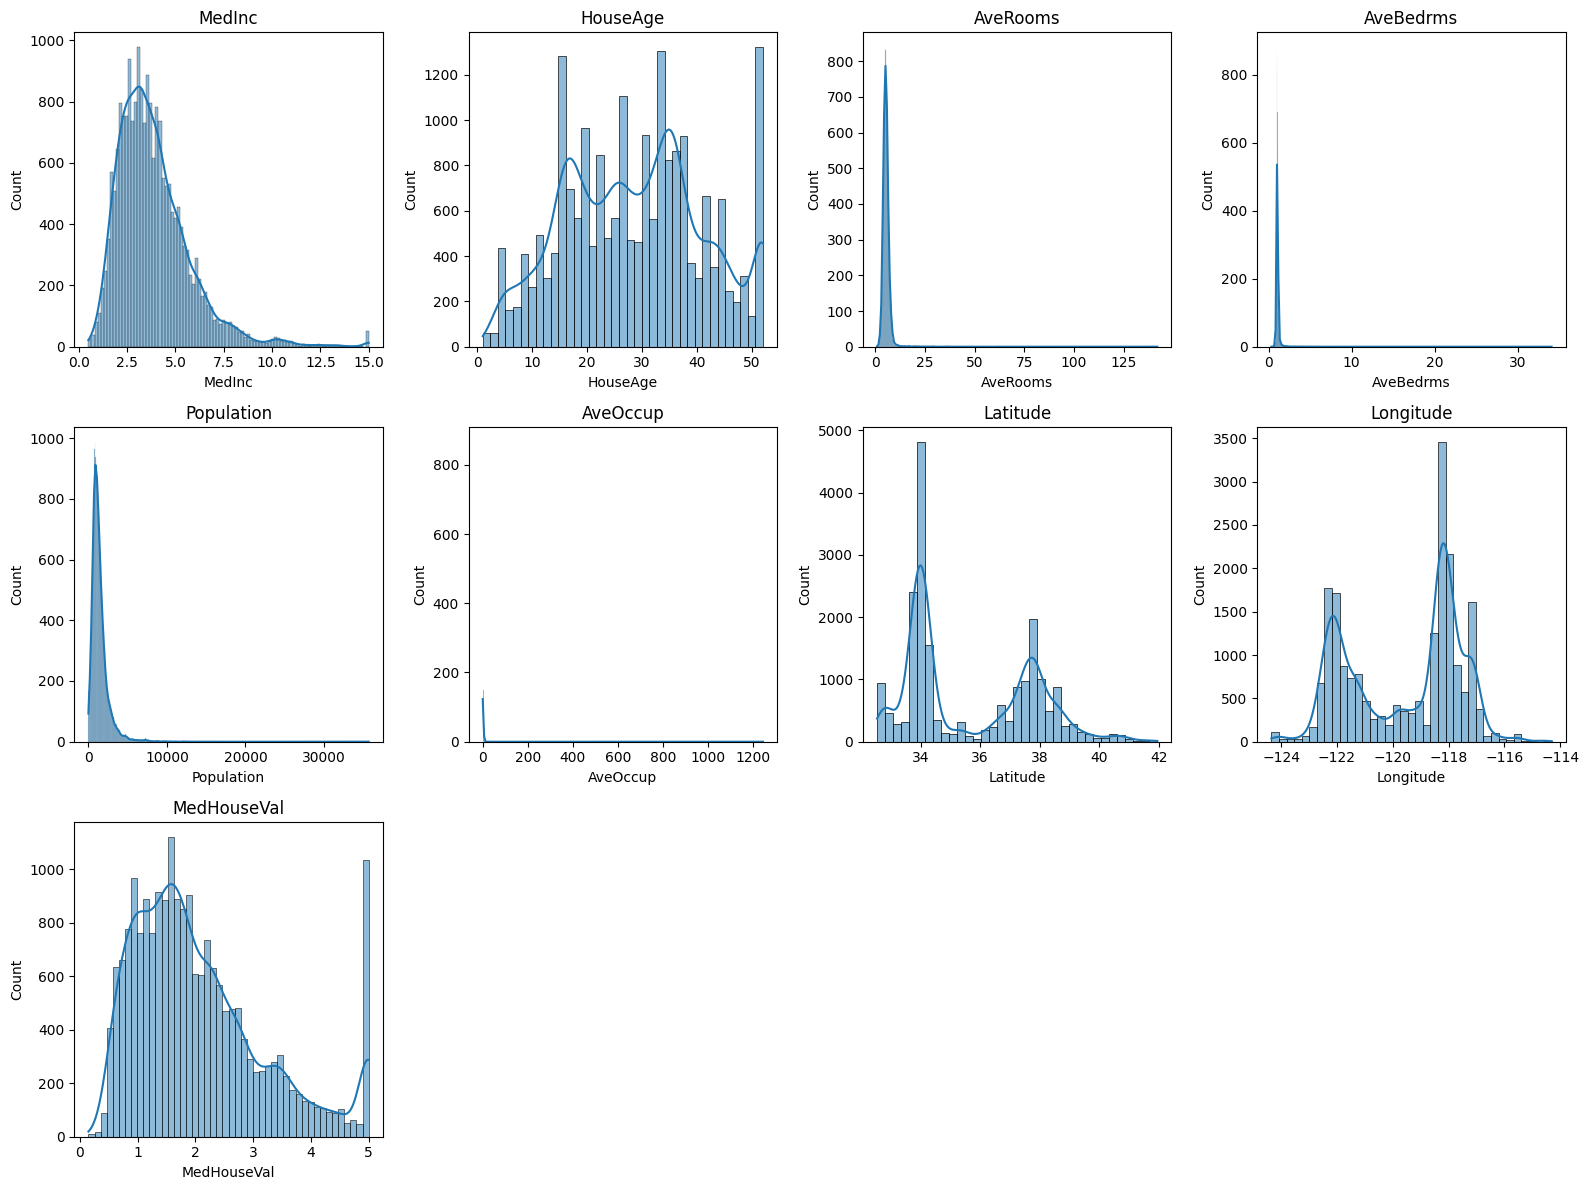

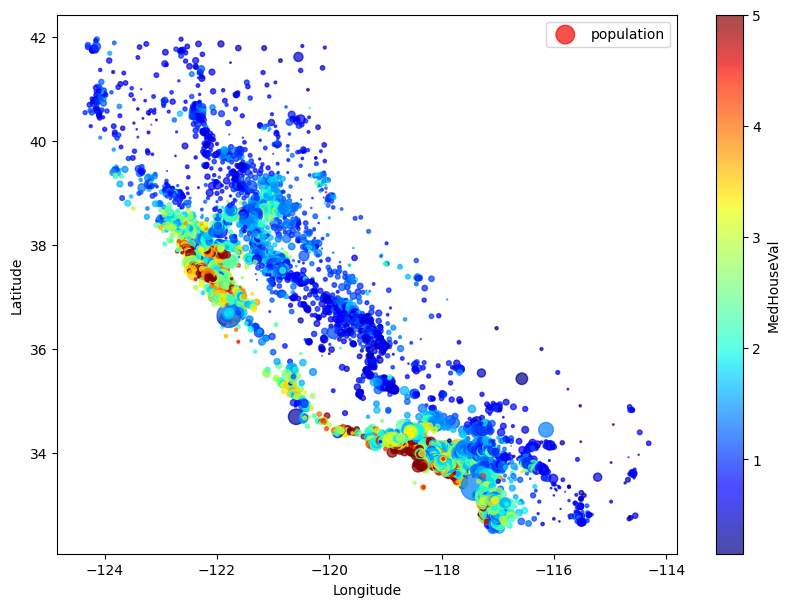

In [2]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target  #this is the target: median house values, its the value we want to predict

print("First 5 rows:")
display(df.head())

print("\nData Summary:")
display(df.describe())

plt.figure(figsize=(16, 12))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

df.plot(kind="scatter", x="Longitude",y="Latitude", c="MedHouseVal", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7), s=df['Population']/100, label="population", alpha=0.7)
plt.show()

In [3]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

class MyLinearRegression:
    def __init__(self):
        self.beta = None

    #def fit(self, X_train, y_train):
    #    X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Add bias term
    #    self.theta = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y_train
    
    def fit(self, X_train, y_train):
        bias = np.ones((X_train.shape[0], 1))    # create a one-column vector with only 1s, amount of rows = amount of rows in data
        X_features = X_train                     # get the feature matrix from trainig data
        X_b = np.c_[bias, X_features]            # Final matrix X

        # solve Normal Equation step-by-step, as shown in lecture slides
        XT = X_b.T
        XTX = XT @ X_b
        XTX_inv = np.linalg.pinv(XTX)           # (XᵀX)^(-1), using pseudoinverse
        XTy = XT @ y_train                      # Xᵀy

        self.beta = XTX_inv @ XTy

    def predict(self, X_test):
        X_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
        return X_b @ self.beta

# b) load data + split
data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.2, random_state=42
)

# c) Train and predict
model = MyLinearRegression()
model.fit(X_train, y_train)
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

mse_train = mean_squared_error(y_train, predictions_train)
mse_test = mean_squared_error(y_test, predictions_test)

print(f"MSE on test data: {mse_test:.4f}")
print(f"MSE on train data: {mse_train:.4f}")
#print("First 5 Predictions:", predictions_test[:5])


MSE on test data: 0.5559
MSE on train data: 0.5179


In [4]:
# d/e) compare with sklearn regression results
sk_lr = LinearRegression(fit_intercept=True)
sk_lr.fit(X_train, y_train)

y_train_pred_sk = sk_lr.predict(X_train)
y_test_pred_sk = sk_lr.predict(X_test)

mse_train_sk = mean_squared_error(y_train, y_train_pred_sk)
mse_test_sk = mean_squared_error(y_test, y_test_pred_sk)

print(f"skLearn regression MSE on train data: {mse_train_sk:.4f}")
print(f"skLearn regression MSE on test data : {mse_test_sk:.4f}")

skLearn regression MSE on train data: 0.5179
skLearn regression MSE on test data : 0.5559
